# Extra Trees Regressor

### Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Importing the dataset

In [3]:
data = pd.read_csv('../dataset/spotify_features.csv', sep=',')
data.head()

,track_popularity,instrumentalness,duration_ms,energy,acousticness,album_month,album_year,danceability,loudness,liveness,genre_code,valence,artist_code
0,67.0,0.004210,162600.0,0.815,0.0724,12,2019,0.726,-4.969,0.35700,2,0.693000,4535
1,70.0,0.000023,176616.0,0.931,0.0794,7,2019,0.675,-3.432,0.19031,2,0.613000,7724
2,60.0,0.000009,169093.0,0.930,0.0287,7,2019,0.718,-3.778,0.20400,2,0.509838,6862
3,62.0,0.000000,187675.0,0.856,0.1870,7,2019,0.449,-4.788,0.17600,2,0.152000,3635
4,58.0,0.000005,207894.0,0.923,0.1460,6,2019,0.679,-6.500,0.12400,2,0.752000,2056


### Splitting the dataset

In [4]:
X = data.drop(columns=['track_popularity'])
y = data['track_popularity']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (11908, 12), (11908,)
Validation set: (3970, 12), (3970,)
Test set: (3970, 12), (3970,)


### Model training

In [5]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('extra_trees_regressor', ExtraTreesRegressor(n_estimators=200, random_state=0))
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('extra_trees_regressor',
                 ExtraTreesRegressor(n_estimators=200, random_state=0))])

### Model evaluation

In [6]:
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)
test_score = model.score(X_test, y_test)

print(f"Train R^2: {train_score:.2f}")
print(f"Validation R^2: {val_score:.2f}")
print(f"Test R^2: {test_score:.2f}")

mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Train R^2: 1.00
Validation R^2: 0.23
Test R^2: 0.21
Mean Squared Error: 442.09
Mean Absolute Error: 16.98


### Cross-validation

In [7]:
scores = cross_validate(model, X, y, cv=6, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,9.643944,0.102685,-0.001664,0.995141
1,10.135646,0.100705,0.061246,0.995623
2,9.746524,0.107404,-0.039692,0.995799
3,9.685785,0.096706,0.101652,0.995544
4,9.682395,0.098766,-0.050445,0.995287
5,10.061440,0.097769,0.137939,0.994918


### Hyperparameter Tuning

In [8]:
# Define the model pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('extra_trees_regressor', ExtraTreesRegressor(random_state=0))
])

# Define the hyperparameters for tuning
param_grid = {
    'extra_trees_regressor__n_estimators': [100, 200, 300],
    'extra_trees_regressor__max_features': ['auto', 'sqrt', 'log2'],
    'extra_trees_regressor__min_samples_split': [2, 5, 10],
    'extra_trees_regressor__min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve and print best parameters
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the best model on training, validation, and test sets
train_score = best_model.score(X_train, y_train)
val_score = best_model.score(X_val, y_val)
test_score = best_model.score(X_test, y_test)

print(f"Best Model Train R^2: {train_score:.2f}")
print(f"Best Model Validation R^2: {val_score:.2f}")
print(f"Best Model Test R^2: {test_score:.2f}")

# Calculate error metrics
mse = mean_squared_error(y_test, best_model.predict(X_test))
mae = mean_absolute_error(y_test, best_model.predict(X_test))
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
69 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\

Best parameters: {'extra_trees_regressor__max_features': 'sqrt', 'extra_trees_regressor__min_samples_leaf': 1, 'extra_trees_regressor__min_samples_split': 2, 'extra_trees_regressor__n_estimators': 300}
Best Model Train R^2: 1.00
Best Model Validation R^2: 0.23
Best Model Test R^2: 0.22
Mean Squared Error: 436.98
Mean Absolute Error: 16.91


### Cross-validation #2

In [9]:
scores = cross_validate(model, X, y, cv=6, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,10.354846,0.121783,-0.001664,0.995141
1,9.720639,0.097271,0.061246,0.995623
2,9.857871,0.105708,-0.039692,0.995799
3,9.747435,0.097207,0.101652,0.995544
4,9.678780,0.099215,-0.050445,0.995287
5,9.738731,0.095692,0.137939,0.994918


### Visualizations

#### Feature Importance

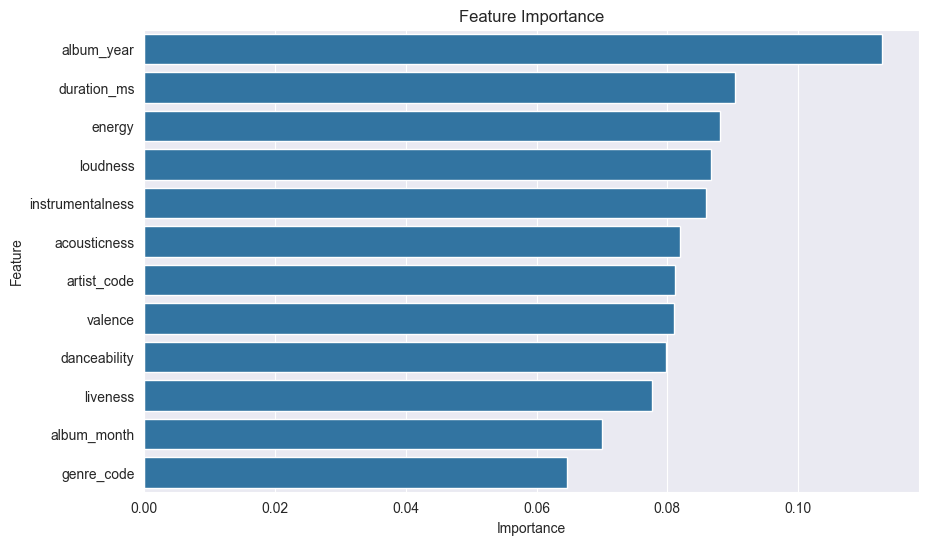

In [10]:
feature_importances = best_model.named_steps['extra_trees_regressor'].feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

#### Predictions vs. True Values

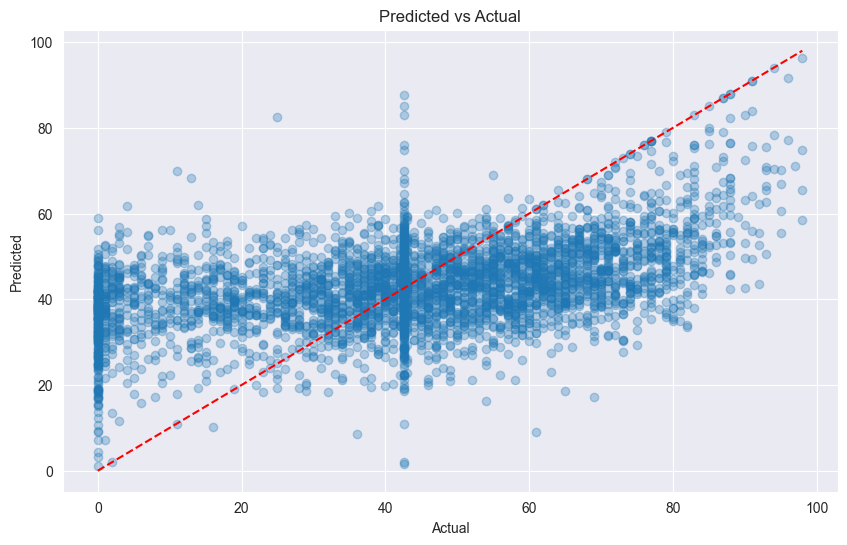

In [11]:
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

#### Residuals

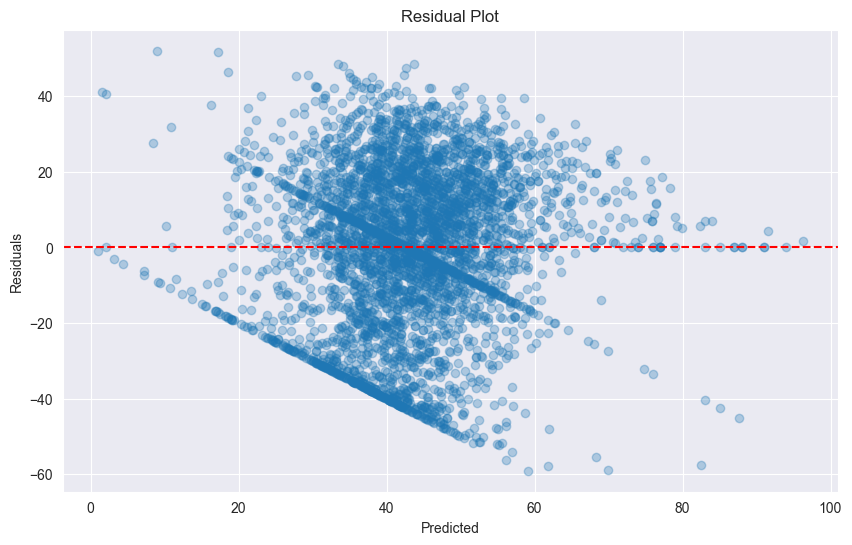

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()